In [10]:
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display


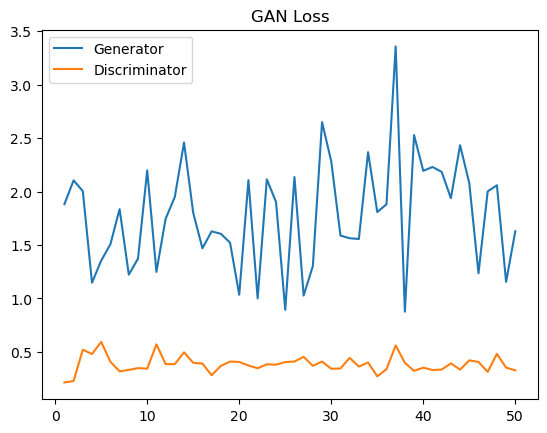

In [11]:
# Placeholder for loss plots
# If you have loss values stored in logs, load and plot them here.
import pandas as pd

# Example:
df = pd.read_csv("outputs/logs/gan_loss.csv")
plt.plot(df['epoch'], df['gen_loss'], label='Generator')
plt.plot(df['epoch'], df['disc_loss'], label='Discriminator')
plt.legend()
plt.title("GAN Loss")
plt.show()

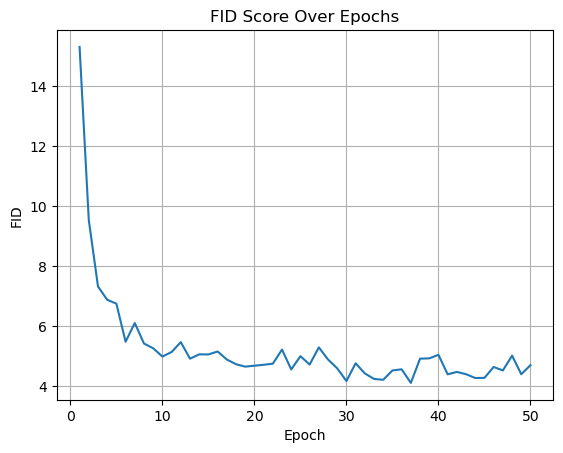

In [12]:
# Placeholder for FID plot
# Example:
df = pd.read_csv("outputs/logs/fid_scores.csv")
plt.plot(df['epoch'], df['fid'], label='FID')
plt.title("FID Score Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("FID")
plt.grid(True)
plt.show()


Showing recent sample images: ['epoch_046.png', 'epoch_047.png', 'epoch_048.png', 'epoch_049.png', 'epoch_050.png']


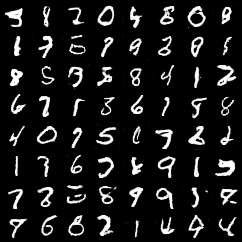

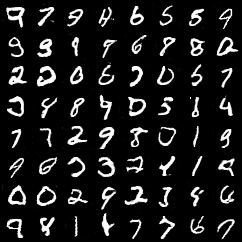

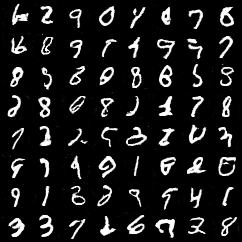

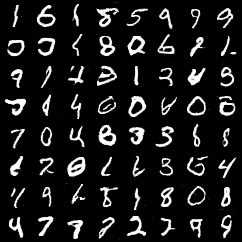

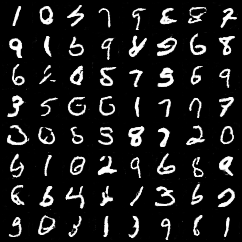

In [13]:
samples_dir = "outputs/samples"
if not os.path.exists(samples_dir):
    print(f"Samples directory not found: {samples_dir}")
else:
    files = sorted([f for f in os.listdir(samples_dir) if f.endswith(".png")])
    show = files[-5:] if len(files) >= 5 else files
    print("Showing recent sample images:", show)
    for f in show:
        display(Image(filename=os.path.join(samples_dir, f)))


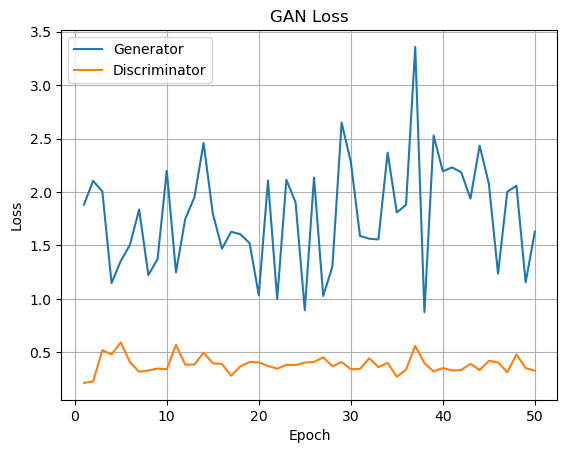

In [14]:
loss_csv = "outputs/logs/gan_loss.csv"

if not os.path.exists(loss_csv):
    print(f"Loss log not found at: {loss_csv}. Run training to generate it.")
else:
    df = pd.read_csv(loss_csv)
    required = {"epoch","gen_loss","disc_loss"}
    if df.empty or not required.issubset(df.columns):
        print("Loss CSV exists but is empty or missing required columns: ['epoch','gen_loss','disc_loss'].")
        display(df.head())
    else:
        plt.figure()
        plt.plot(df['epoch'], df['gen_loss'], label='Generator')
        plt.plot(df['epoch'], df['disc_loss'], label='Discriminator')
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("GAN Loss")
        plt.legend()
        plt.grid(True)
        plt.show()


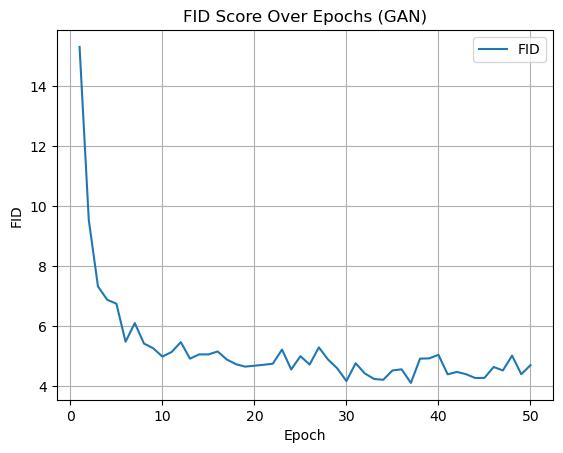

In [15]:
fid_csv = "outputs/logs/fid_scores.csv"

if not os.path.exists(fid_csv):
    print(f"FID log not found at: {fid_csv}. Run training to generate it.")
else:
    df_fid = pd.read_csv(fid_csv)
    if df_fid.empty or ("epoch" not in df_fid.columns or "fid" not in df_fid.columns):
        print("FID CSV exists but is empty or missing required columns: ['epoch','fid'].")
        display(df_fid.head())
    else:
        plt.figure()
        plt.plot(df_fid['epoch'], df_fid['fid'], label="FID")
        plt.xlabel("Epoch")
        plt.ylabel("FID")
        plt.title("FID Score Over Epochs (GAN)")
        plt.legend()
        plt.grid(True)
        plt.show()


In [16]:
summary = []
# Optional: auto-fill with last values if logs exist
if os.path.exists("outputs/logs/gan_loss.csv"):
    df = pd.read_csv("outputs/logs/gan_loss.csv")
    if not df.empty:
        last = int(df['epoch'].iloc[-1])
        summary.append({"Model":"GAN","Final Epoch":last,"Final Gen Loss":df['gen_loss'].iloc[-1],"Final Disc Loss":df['disc_loss'].iloc[-1]})
if os.path.exists("outputs/logs/fid_scores.csv"):
    df_f = pd.read_csv("outputs/logs/fid_scores.csv")
    if not df_f.empty:
        best_fid = df_f['fid'].min()
        summary[0]["Best FID"] = best_fid if summary else best_fid

import pandas as pd
pd.DataFrame(summary)


,Model,Final Epoch,Final Gen Loss,Final Disc Loss,Best FID
0,GAN,50,1.628194,0.326404,4.118704


Showing recent sample images: ['epoch_046.png', 'epoch_047.png', 'epoch_048.png', 'epoch_049.png', 'epoch_050.png']


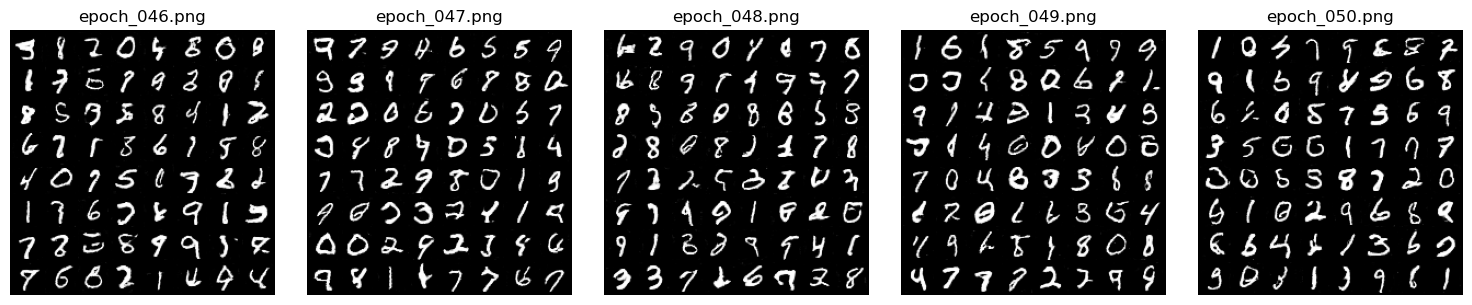

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image as PILImage

samples_dir = "outputs/samples"

if not os.path.exists(samples_dir):
    print(f"Samples directory not found: {samples_dir}")
else:
    files = sorted([f for f in os.listdir(samples_dir) if f.endswith(".png")])
    show = files[-5:] if len(files) >= 5 else files
    print("Showing recent sample images:", show)

    # Set up the plot
    fig, axes = plt.subplots(1, len(show), figsize=(len(show) * 3, 3))

    for ax, f in zip(axes, show):
        img_path = os.path.join(samples_dir, f)
        img = PILImage.open(img_path)
        ax.imshow(img)
        ax.set_title(f)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


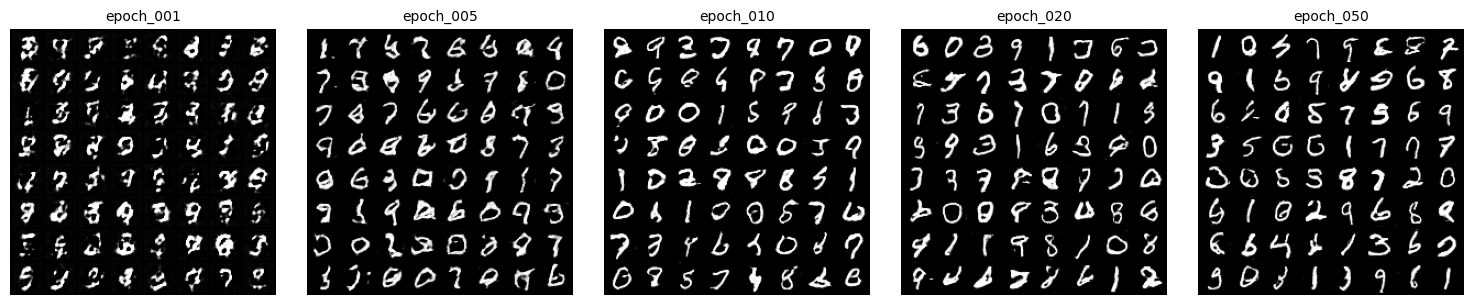

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image as PILImage

samples_dir = "outputs/samples"

if not os.path.exists(samples_dir):
    print(f"Samples directory not found: {samples_dir}")
else:
    # Select specific epochs to show progression
    # Change this list if you want different epochs
    epochs_to_show = [1, 5, 10, 20, 50]

    # Build file list based on epochs
    show_files = []
    for e in epochs_to_show:
        fname = f"epoch_{e:03d}.png"  # Matches your saved file format
        if fname in os.listdir(samples_dir):
            show_files.append(fname)
        else:
            print(f"Warning: {fname} not found in samples directory.")

    # Plot images side-by-side
    fig, axes = plt.subplots(1, len(show_files), figsize=(len(show_files) * 3, 3))

    for ax, f in zip(axes, show_files):
        img_path = os.path.join(samples_dir, f)
        img = PILImage.open(img_path)
        ax.imshow(img)
        ax.set_title(f.replace(".png", ""), fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


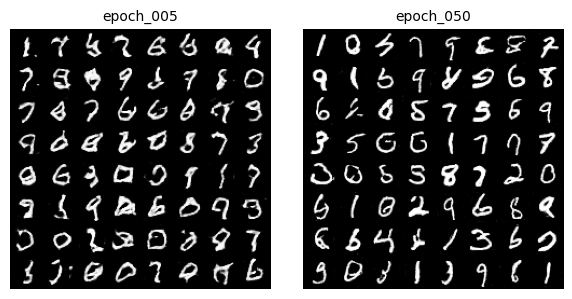

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image as PILImage

samples_dir = "outputs/samples"

if not os.path.exists(samples_dir):
    print(f"Samples directory not found: {samples_dir}")
else:
    # Epochs to display
    epochs_to_show = [5, 50]

    # Build file list based on epochs
    show_files = []
    for e in epochs_to_show:
        fname = f"epoch_{e:03d}.png"  # Matches your saved file format
        if fname in os.listdir(samples_dir):
            show_files.append(fname)
        else:
            print(f"Warning: {fname} not found in samples directory.")

    # Plot images side-by-side
    fig, axes = plt.subplots(1, len(show_files), figsize=(len(show_files) * 3, 3))

    for ax, f in zip(axes, show_files):
        img_path = os.path.join(samples_dir, f)
        img = PILImage.open(img_path)
        ax.imshow(img)
        ax.set_title(f.replace(".png", ""), fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
